# Отчет о взаимодействии Netflix

https://www.kaggle.com/datasets/konradb/netflix-engagement-report

![Alt text](Pictures/dataset-cover-4.jpg)

**О наборе данных**
Со страницы отчета:

С момента запуска наших еженедельных топ-10 и самых популярных списков в 2021 году Netflix предоставил больше информации о том, что смотрят люди, чем любой другой стример, кроме YouTube. И теперь мы считаем, что пришло время идти дальше.

Начиная с сегодняшнего дня мы будем публиковать What We Watched: A Netflix Engagement Report два раза в год. Это всеобъемлющий отчет о том, что люди смотрели на Netflix за шестимесячный период1, в том числе:

Часы просмотра для каждого названия - оригинального и лицензированного - смотрели более 50 000 часов2;

Дата премьеры3 для любого сериала или фильма Netflix; и

Было ли название доступно по всему миру.

В общей сложности этот отчет охватывает более 18 000 наименований, что составляет 99% всех просмотров на Netflix, и почти 100 миллиардов часов просмотра.

Более 60% названий Netflix, выпущенных в период с января по июнь 2023 года, появились в наших еженедельных списках Топ-10. Таким образом, хотя этот отчет имеет более широкий охват, тенденции, отраженные в нем, очень похожи на тенденции, включенные в список 10 лучших, в том числе:

Сила возвращающихся фаворитов, таких как Джинни и Джорджия, Алиса в пограничной стране, Отмеченное сердце, Внешние банки, Ты, Королева Шарлотта: История Бриджертона, XO Китти и сиквелы фильмов Murder Mystery 2 и Extraction 2;

Популярность новых сериалов, таких как The Night Agent, The Diplomat, Beef, The Glory, Alpha Males, FUBAR и Fake Profile, которые генерируют огромную аудиторию и фэндомы;

Размер аудитории наших фильмов во всех жанрах, включая The Mother, Luther: The Fallen Sun, You People, AKA, ¡Que viva México! и голод;

Энтузиазм к неанглийским историям, который вызвал 30% всех просмотров;

Выдержка игр на Netflix, которая выходит далеко за рамки их премьер. All Quiet на Западном фронте, например, дебютировал в октябре 2022 года и собрал 80 мил часов в период с января по июнь; и

Спрос на более старые, лицензированные названия, что создает огромную ценность для наших членов и правообладателей.

При чтении отчета важно помнить:

Успех на Netflix бывает всех форм и размеров и не определяется часами просмотра в одиночку. У нас есть чрезвычайно успешные фильмы и телешоу с более низкими и более высокими часами просмотра. Все дело в том, взволновал ли фильм или телешоу свою аудиторию - и размер этой аудитории по сравнению с экономикой названия; и

Для сравнения между названиями лучше всего использовать наши еженедельные списки Топ-10 и Самые популярные списки, которые учитывают время выполнения и даты премьеры.

Это большой шаг вперед для Netflix и нашей отрасли. Мы считаем, что информация о просмотре в этом отчете в сочетании с нашими еженедельными списками Топ-10 и Самых популярных - даст создателям и нашей отрасли более глубокое представление о нашей аудитории и о том, что резонирует с ними.

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Переменные

a = 1000000 # Переменная для размера head

b = 20 # Переменная для размера графика

In [38]:
# Определите путь к файлу
file_path = "4_Отчет_о_взаимодействи_Netflix.csv"

# Загрузите данные в датафрейм
input_raw = pd.read_csv(file_path)

# Выведите первые несколько строк для проверки
input_raw.head(a)

,Title,Available Globally?,Release Date,Hours Viewed,Unnamed: 4,Unnamed: 5
0,The Night Agent: Season 1,Yes,2023-03-23,"812,100,000",NaN,NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"665,100,000",NaN,NaN
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"622,800,000",NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,"507,700,000",NaN,NaN
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000",NaN,NaN
...,...,...,...,...,...,...
18215,NaN,NaN,NaN,NaN,NaN,NaN
18216,NaN,NaN,NaN,NaN,NaN,NaN
18217,NaN,NaN,NaN,NaN,NaN,NaN
18218,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Удаление колонок Unnamed: 4 и Unnamed: 5
input_raw = input_raw.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1)

# Удаление строк, где в колонке Title ничего нет
input_raw = input_raw.dropna(subset=['Title'])

# Преобразование столбца Release Date в формат даты
input_raw['Release Date'] = pd.to_datetime(input_raw['Release Date'], format='%Y-%m-%d', errors='coerce')

# Преобразование столбца Hours Viewed в тип float
input_raw['Hours Viewed'] = input_raw['Hours Viewed'].replace(',', '', regex=True).astype(float)

# Вывод обновленного датафрейма
input_raw.head(a)

,Title,Available Globally?,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0
...,...,...,...,...
18209,راس السنة,No,NaT,100000.0
18210,心が叫びたがってるんだ。,No,NaT,100000.0
18211,두근두근 내 인생,No,NaT,100000.0
18212,라디오 스타,No,NaT,100000.0


In [44]:
#input_raw.dtypes

In [41]:
input_raw.describe()

,Release Date,Hours Viewed
count,4855,1.821400e+04
mean,2020-05-09 13:39:48.383110144,5.130954e+06
min,2010-04-01 00:00:00,1.000000e+05
25%,2018-11-30 00:00:00,2.000000e+05
50%,2020-08-04 00:00:00,7.000000e+05
75%,2022-02-04 00:00:00,3.400000e+06
max,2023-06-30 00:00:00,8.121000e+08
std,NaN,1.871767e+07


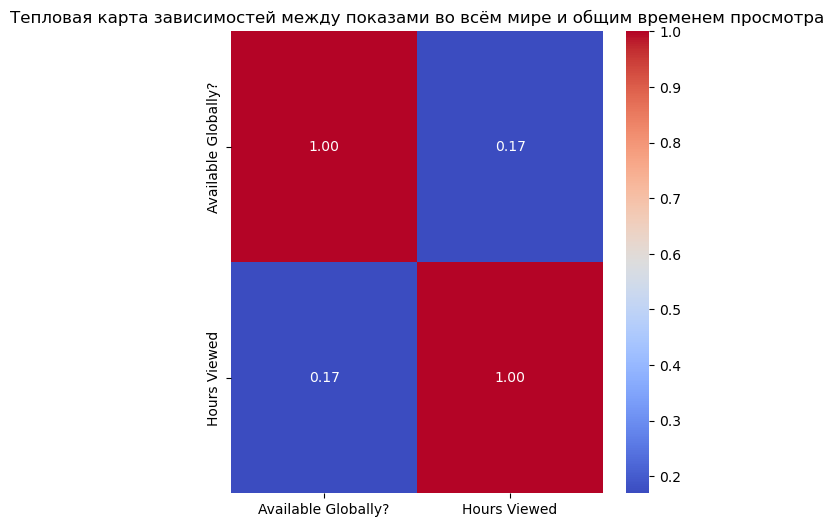

In [45]:
df = input_raw.copy(deep = True)
# Предположим, что ваш датафрейм df уже загружен

# Замените "Yes" и "No" на 1 и 0 соответственно в столбце "Available Globally?"
df['Available Globally?'] = df['Available Globally?'].map({'Yes': 1, 'No': 0})

# Построение тепловой карты
plt.figure(figsize=(b * 0.3, b * 0.3))
heatmap_data = df[['Available Globally?', 'Hours Viewed']]
heatmap = sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Настройка внешнего вида графика
plt.title('Тепловая карта зависимостей между показами во всём мире и общим временем просмотра')
plt.show()

**Общее время просмотра не зависит от того, показывает фильм во всём мире или нет**

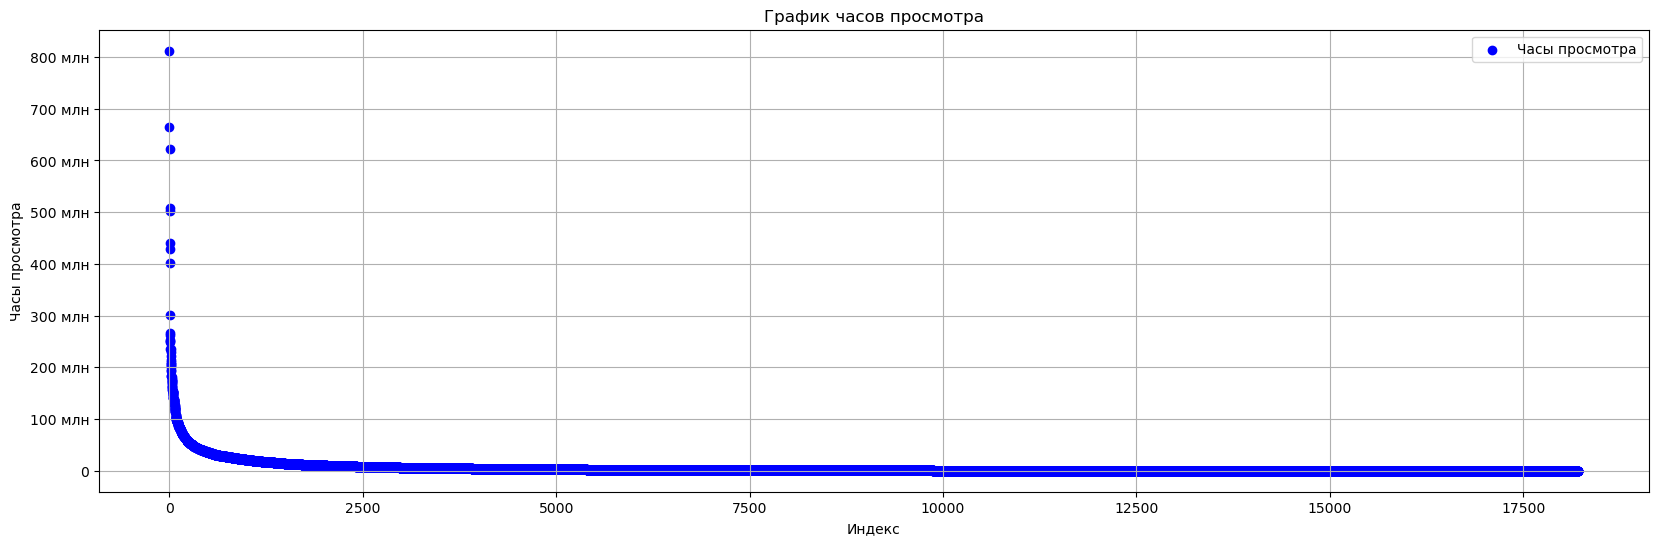

In [46]:
df = input_raw.copy(deep=True)

# Настройка размера графика
fig, ax = plt.subplots(figsize=(b, b * 0.3))

# Построение точечного графика
scatter = ax.scatter(df.index, df['Hours Viewed'], c='blue', marker='o', label='Часы просмотра')

# Добавление сетки
ax.grid(True)

# Настройка подписей на русском языке
ax.set_xlabel('Индекс')
ax.set_ylabel('Часы просмотра')

# Установка меток на оси y
plt.yticks([0, 100_000_000, 200_000_000, 300_000_000, 400_000_000, 500_000_000, 600_000_000, 700_000_000, 800_000_000],
           ['0', '100 млн', '200 млн', '300 млн', '400 млн', '500 млн', '600 млн', '700 млн', '800 млн'])

# Добавление легенды
ax.legend()

# Добавление названия графика
ax.set_title('График часов просмотра')

# Отображение графика
plt.show()

**Более 100 млн. часов просмотра есть у менее чем 1000 фильмов.** 